#### Students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.
Student can download data in .csv format from the following link:
https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds
=22r0&display=line


In [9]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


In [2]:
def parser(x):
    return datetime.strptime(x, '%Y-%m')
series = read_csv('sales-of-shampoo-over-a-three-ye.csv', header=1, parse_dates=[0], index_col=0, 
                  squeeze=True, date_parser=parser)
series.head()

Month
0001-01-01 00:00:00    266.0
0001-02-01 00:00:00    145.9
0001-03-01 00:00:00    183.1
0001-04-01 00:00:00    119.3
0001-05-01 00:00:00    180.3
Name: Unnamed: 1, dtype: float64

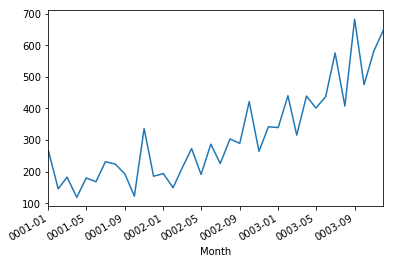

In [3]:
series.plot()
pyplot.show()

In [4]:
X = series.values
X

array([ 266. ,  145.9,  183.1,  119.3,  180.3,  168.5,  231.8,  224.5,
        192.8,  122.9,  336.5,  185.9,  194.3,  149.5,  210.1,  273.3,
        191.4,  287. ,  226. ,  303.6,  289.9,  421.6,  264.5,  342.3,
        339.7,  440.4,  315.9,  439.3,  401.3,  437.4,  575.5,  407.6,
        682. ,  475.3,  581.3,  646.9])

In [5]:
size = int(len(X) * 0.60)
size

21

In [6]:
train, test = X[0:size], X[size:len(X)]

In [7]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y_hat = output[0]
    predictions.append(y_hat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (y_hat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=272.964502, expected=421.600000
predicted=290.313796, expected=264.500000
predicted=349.117710, expected=342.300000
predicted=306.512938, expected=339.700000
predicted=387.376402, expected=440.400000
predicted=348.154245, expected=315.900000
predicted=386.308849, expected=439.300000
predicted=356.082135, expected=401.300000
predicted=446.379456, expected=437.400000
predicted=394.737380, expected=575.500000
predicted=434.915427, expected=407.600000
predicted=507.923421, expected=682.000000
predicted=435.482971, expected=475.300000
predicted=652.743782, expected=581.300000
predicted=546.343495, expected=646.900000
Test MSE: 7547.803


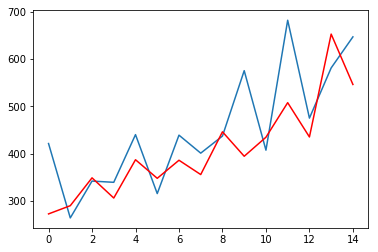

In [8]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()